# Ames Housing Prices: Advanced Regression

# Definition

## Project Overview
Student provides a high-level overview of the project in layman’s terms. Background information such as the problem domain, the project origin, and related data sets or input data is given.

Housing markets are incredibly competitive. Using a dataset of 79 characteristics (variables) of nearly 1500 homes in the Ames, Iowa area a potential home seller or buyer could possibly influence price negotiations of a house by examining more than just the number of bedrooms, number of bathrooms and square footage of a particular house. The Ames Housing dataset was compiled by Dean De Cock for use in data science education.

## Problem Statement
The problem which needs to be solved is clearly defined. A strategy for solving the problem, including discussion of the expected solution, has been made.

The problem setforth is utilizing this housing dataset to its maximum potential by identifying optimal features to include in a model. The strategy to identify the optimal features through the use of data exploration to identify patterns, correlations and feature engineering to determine the appropriate inputs for the model. The expected solution will involve a subset of the features in the dataset that best contribute to the `'SalePrice'` of any given home.

## Metrics
Metrics used to measure performance of a model or result are clearly defined. Metrics are justified based on the characteristics of the problem.

The performance metric best suited for this type of advanced regression problem is the coefficient of determination, R^2. The coefficient of determination is justifiable for a problem involving regression analysis because its range between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the chosen subset of features.

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Load the Ames housing data
data = pd.read_csv('train.csv')
prices = data['SalePrice']
features = data.drop('SalePrice', axis = 1)

# Print brief overview of dataset
print "Ames housing dataset has {} data points with {} variables each.".format(*data.shape)

# Any results you write to the current directory are saved as output.

Ames housing dataset has 1460 data points with 81 variables each.


# Analysis

## Data Exploration
If a dataset is present, features and calculated statistics relevant to the problem have been reported and discussed, along with a sampling of the data. In lieu of a dataset, a thorough description of the input space or input data has been made. Abnormalities or characteristics about the data or input that need to be addressed have been identified.

Given the problem domain is relative sale prices of homes based on a calculated subset of features, elementary statistics of the housing data will be useful to analyze various prediction results from the implemented model. Statistics to be claculated include minimum price, maximum price, mean price, median price and the standard deviation.

In [18]:
# Minimum price of the data
minimum_price = prices.min()

# Maximum price of the data
maximum_price = prices.max()

# Mean price of the data
mean_price = prices.mean()

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = prices.std()

# Show the calculated statistics
print "Statistics for Ames housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Ames housing dataset:

Minimum price: $34,900.00
Maximum price: $755,000.00
Mean price: $180,921.20
Median price $163,000.00
Standard deviation of prices: $79,442.50


In [19]:
features.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


## Feature Observation
Description of the features and their respective value ranges can be found in the data_description.txt file 

In [20]:
data.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

## Exploratory Visualization
A visualization has been provided that summarizes or extracts a relevant characteristic or feature about the dataset or input data with thorough discussion. Visual cues are clearly defined.

In [21]:
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

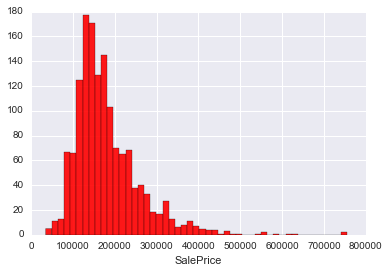

In [22]:
sbn.distplot(data['SalePrice'], kde = False, color = 'r', hist_kws={'alpha': 0.9})

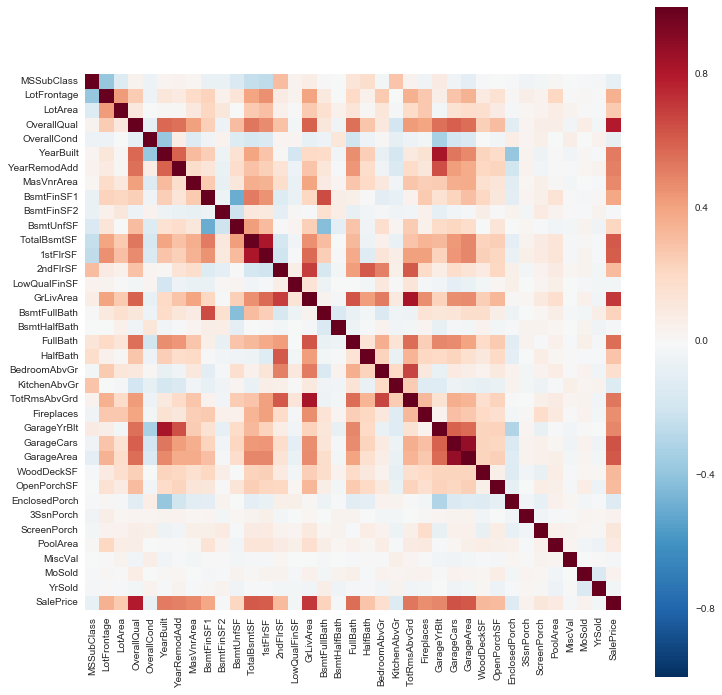

In [23]:
corr = data.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sbn.heatmap(corr, vmax=1, square=True)

In [24]:
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.790981600584
GrLivArea: 	0.708624477613
GarageCars: 	0.640409197258
GarageArea: 	0.623431438918
TotalBsmtSF: 	0.613580551559
1stFlrSF: 	0.605852184692
FullBath: 	0.560663762748
TotRmsAbvGrd: 	0.533723155582
YearBuilt: 	0.522897332879
YearRemodAdd: 	0.507100967111
GarageYrBlt: 	0.486361677488
MasVnrArea: 	0.477493047096
Fireplaces: 	0.466928836752
BsmtFinSF1: 	0.386419806242
LotFrontage: 	0.351799096571
WoodDeckSF: 	0.324413444568
2ndFlrSF: 	0.319333802832
OpenPorchSF: 	0.315856227116
HalfBath: 	0.284107675595
LotArea: 	0.263843353871
BsmtFullBath: 	0.227122233131
BsmtUnfSF: 	0.214479105547
BedroomAbvGr: 	0.168213154301
KitchenAbvGr: 	-0.135907370842
EnclosedPorch: 	-0.128577957926
ScreenPorch: 	0.111446571143
PoolArea: 	0.0924035494919
MSSubClass: 	-0.0842841351266
OverallCond: 	-0.0778558940487
MoSold: 	0.0464322452238
3SsnPorch: 	0.0445836653357
YrSold: 	-0.0289225851687
LowQualFinSF: 	-0.0

## Feature Observation
- `'OverallQual'` is  the Rating of the overall material and finish of the house (1-10, Very Poor to Very Excellent)
- `'GrLiveArea'` is above grade (ground) living area square feet
- `'GarageCars'` is size of garage in car capacity
- `'GarageArea'` is size of garage in square feet
- `'TotalBsmtSF'` is total square feet of basement area
- `'1stFlrSF'` is first Floor square feet
- `'FullBath'` is full bathrooms above grade
- `'TotRmsAbvGrd'` is total rooms above grade (does not include bathrooms)
- `'YearBuilt'` is the original construction date
- `'YearRemodAdd'` is remodel date (same as construction date if no remodeling or additions)

Looking at the top 10 features that correlate most (>0.50) highly with 'SalePrice' several features are highly correlated amongst certain descriptive categories such as Garage space wich contains attributes 'GarageCars' and 'GarageArea'. The correlation graphs and data above along with my intuition and sampling of various physical real estate ads should allow for a initial reduction in the feature set for ease of analysis and model building. The features chosen for an initial analysis include `'OverallQual'`, `'GrLiveArea'`, `'GarageCars'`, `'FullBath'` and `'TotRmsAbvGrd'`.

## Algorithms and Techniques
Algorithms and techniques used in the project are thoroughly discussed and properly justified based on the characteristics of the problem.

For this particular regression type problem the algorithm most suited for the characteristics of this problem are decision trees. The goal of a decision tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. There are many advantages to using a decision tree for this particular problem because they are visual, simple to understand and easy to interpret. Additionally to implement a decision tree there is little data preparation to do which allows for faster iterations and more nimble and adaptable analysis. Decision trees are also easy to refine by augmenting  the minimum number of samples required at a leaf node or setting the maximum depth of the tree to avoid overfitting.

## Benchmark
Student clearly defines a benchmark result or threshold for comparing performances of solutions obtained.

The performance metric best suited for this type of advanced regression problem is the coefficient of determination, R^2. The coefficient of determination is justifiable for a problem involving regression analysis because its range between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the chosen subset of features. An optimistic benchmark to strive for would be a coefficient of determination of at least 0.90. A result where the test data will fall within 0.10 of the `'SalePrice'` given in the training dataset.

# Methodology

## Data Preprocessing
All preprocessing steps have been clearly documented. Abnormalities or characteristics about the data or input that needed to be addressed have been corrected. If no data preprocessing is necessary, it has been clearly justified. 

In order to implement the decision tree model the training data has to be processed. The first step in processing the data is creating a new data structure only containing the features selected from the feature observation section above. All five features are described with numeric values and are present for all 1460 data points in the training dataset. There are no obvious abnormalities or characteristics about the training dataset that needs to be addressed.

In [25]:
# Created a data structure with the reduced  training feature set labeled 'X'
X = pd.concat([data['OverallQual'], data['GrLivArea'], data['GarageCars'], data['FullBath'], data['TotRmsAbvGrd']], axis=1)

# Used describe function on newly created dataset to verify all 1460 data points have corresponding features
X.describe()

,OverallQual,GrLivArea,GarageCars,FullBath,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,1.565068,6.517808
std,1.382997,525.480383,0.747315,0.550916,1.625393
min,1.000000,334.000000,0.000000,0.000000,2.000000
25%,5.000000,1129.500000,1.000000,1.000000,5.000000
50%,6.000000,1464.000000,2.000000,2.000000,6.000000
75%,7.000000,1776.750000,2.000000,2.000000,7.000000
max,10.000000,5642.000000,4.000000,3.000000,14.000000


In [27]:
# Created a data structure for the training labels called 'y'
y = data['SalePrice']

y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Implementation
The process for which metrics, algorithms, and techniques were implemented with the given datasets or input data has been thoroughly documented. Complications that occurred during the coding process are discussed.

## Refinement
The process of improving upon the algorithms and techniques used is clearly documented. Both the initial and final solutions are reported, along with intermediate solutions, if necessary.

# Results

## Model Evaluation and Validation
The final model’s qualities — such as parameters — are evaluated in detail. Some type of analysis is used to validate the robustness of the model’s solution.

## Justification 
The final results are compared to the benchmark result or threshold with some type of statistical analysis. Justification is made as to whether the final model and solution is significant enough to have adequately solved the problem.

# Conclusion

## Free-Form Visualization
A visualization has been provided that emphasizes an important quality about the project with thorough discussion. Visual cues are clearly defined.

## Reflection
Student adequately summarizes the end-to-end problem solution and discusses one or two particular aspects of the project they found interesting or difficult.

## Improvement
Discussion is made as to how one aspect of the implementation could be improved. Potential solutions resulting from these improvements are considered and compared/contrasted to the current solution.